In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
train_data = pd.read_csv("../data/credit_card_default_train.csv")
test_data = pd.read_csv("../data/credit_card_default_test.csv")

In [5]:
train_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [6]:
test_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
0,A20170,500K,M,Other,Single,31-45,0,0,0,0,...,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
1,A16887,200K,F,Other,Single,31-45,0,0,0,0,...,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
2,A3430,400K,M,Other,Other,Less than 30,-1,-1,2,0,...,8984,11294,9561,993,6930,0,2310,0,2310,40060
3,A3696,1.5M,M,Graduate,Single,31-45,1,-1,-1,-2,...,5775,0,0,0,5775,5775,0,0,0,0
4,A20474,100K,F,High School,Other,Less than 30,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def changeBalanceAmount(amount):
    if ('K' in amount):
        return float(amount[:-1])*1000
    elif ('M' in amount):
        return float(amount[:-1])*1000000
    
def changeGender(g):
    if (g == 'M'):
        return 2
    elif (g == "F"):
        return 1
    
def changeEDUCATION_STATUS(es):
    if (es == 'Graduate'):
        return 1
    elif (es == "High School"):
        return 2
    elif (es == "Other"):
        return 3
    
def changeMARITAL_STATUS(ms):
    if (ms == 'Single'):
        return 1
    elif (ms == "Married"):
        return 2
    elif (ms == "Other"):
        return 3
    
def changeAGE(a):
    if (a == '31-45'):
        return 1
    elif (a == "Less than 30"):
        return 2
    elif (a == "46-65"):
        return 3
    elif (a == "More than 65"):
        return 4

In [8]:
train_data['Balance_Limit_V1']= train_data['Balance_Limit_V1'].apply(lambda x: changeBalanceAmount(x))
train_data['Gender']= train_data['Gender'].apply(lambda x: changeGender(x))
train_data['EDUCATION_STATUS']= train_data['EDUCATION_STATUS'].apply(lambda x: changeEDUCATION_STATUS(x))
train_data['MARITAL_STATUS']= train_data['MARITAL_STATUS'].apply(lambda x: changeMARITAL_STATUS(x))
train_data['AGE']= train_data['AGE'].apply(lambda x: changeAGE(x))

test_data['Balance_Limit_V1']=test_data['Balance_Limit_V1'].apply(lambda x: changeBalanceAmount(x))

Text(0.5, 1, 'Heatmap of Correlation Matrix')

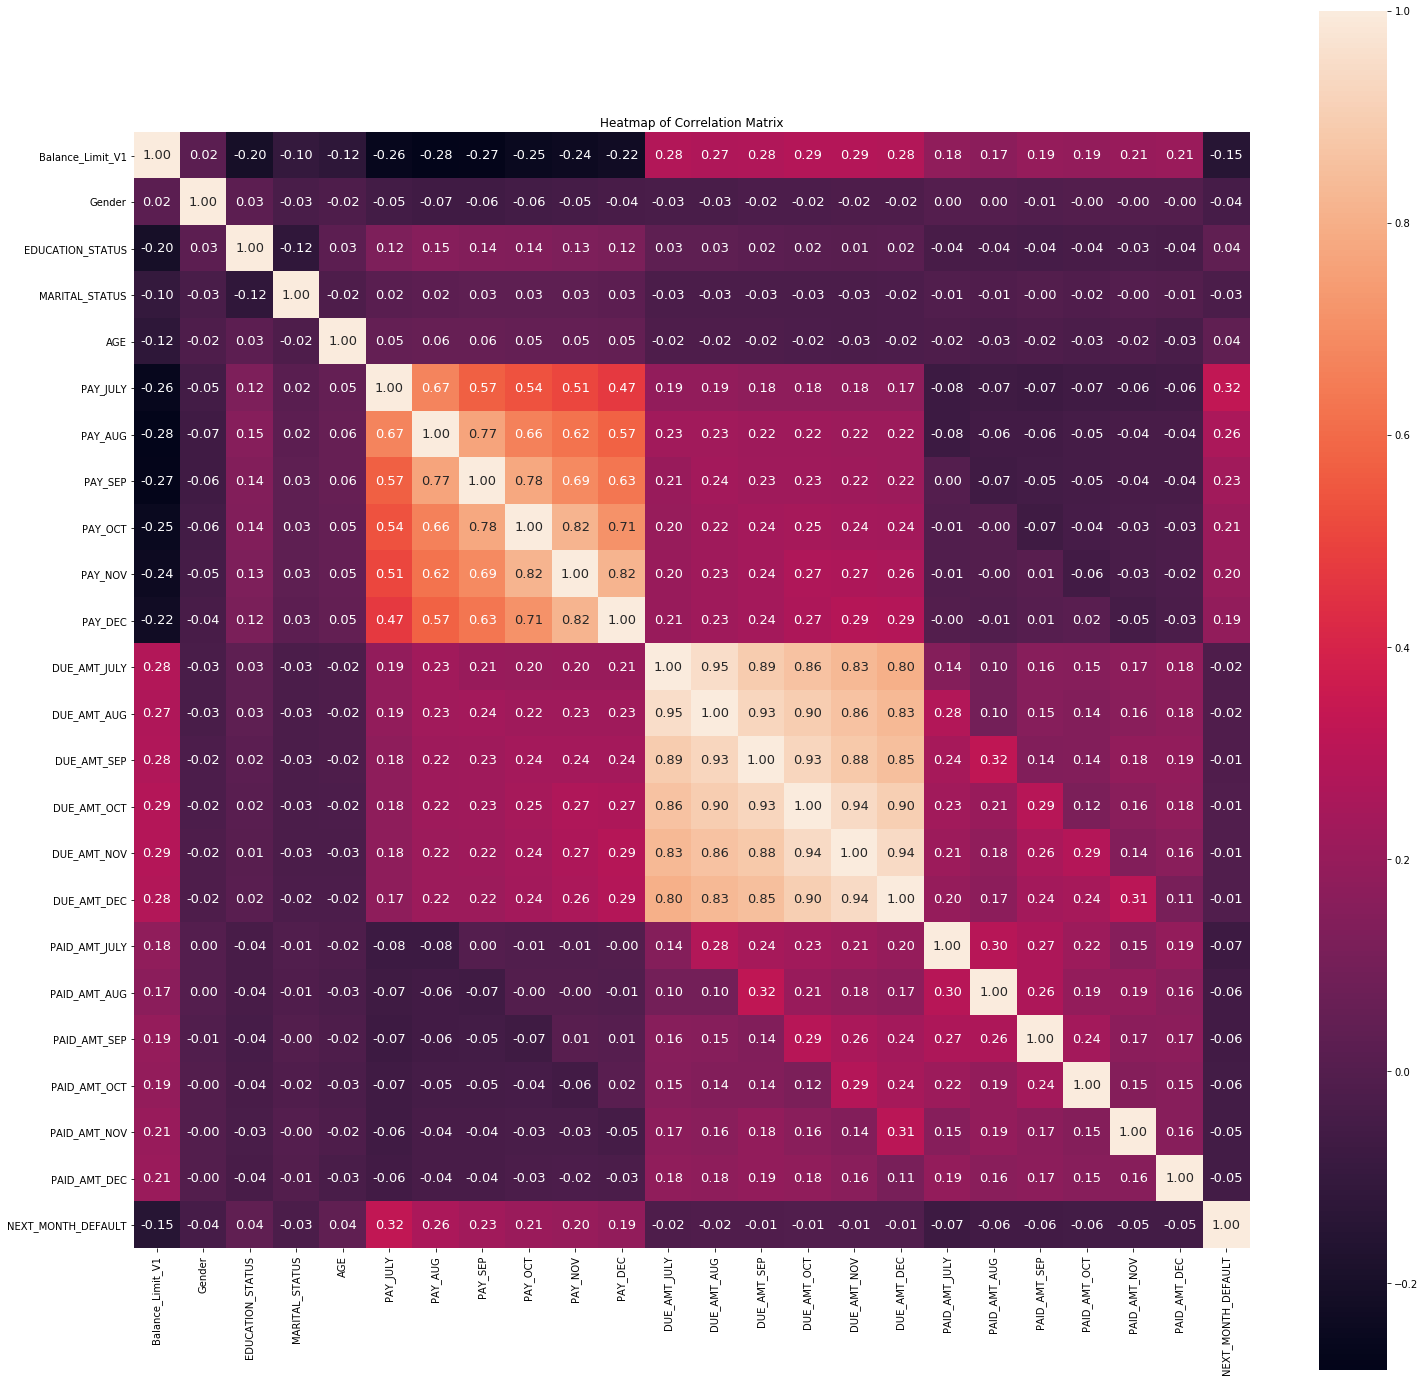

In [9]:
corr=train_data.corr()
corr = (corr)
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

In [10]:
X = train_data.iloc[:,1:24]
Y = train_data['NEXT_MONTH_DEFAULT']

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

OHE = OneHotEncoder(sparse=False)
sex = OHE.fit_transform(X[['Gender']])
marriage = OHE.fit_transform(X[['MARITAL_STATUS']])
education = OHE.fit_transform(X[['EDUCATION_STATUS']])
age = OHE.fit_transform(X[['AGE']])

cat_variables = np.hstack((sex, marriage, education, age))

cat_var_names = ['Gender','MARITAL_STATUS', 'EDUCATION_STATUS', 'AGE']

num_variables = X.drop(cat_var_names, axis=1)

scaler = StandardScaler().fit(num_variables)
stdz_num_variables = scaler.transform(num_variables)

final_X = np.hstack((cat_variables,stdz_num_variables))

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

test = SelectKBest(k=10)
fit = test.fit(final_X,Y)
np.set_printoptions(precision=1)
print(fit.scores_)
features = fit.transform(final_X)

X_train, X_test, y_train, y_test = train_test_split(features,Y, test_size=0.2, random_state=42)

[4.2e+01 4.2e+01 1.9e+01 1.9e+01 5.7e+01 2.3e+01 1.4e+01 2.7e+01 4.7e+00
 1.7e+01 7.9e-01 5.4e+02 2.8e+03 1.7e+03 1.3e+03 1.1e+03 1.0e+03 8.7e+02
 9.6e+00 5.5e+00 5.2e+00 2.3e+00 1.4e+00 1.0e+00 1.3e+02 8.4e+01 8.0e+01
 7.6e+01 7.0e+01 6.6e+01]


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

estimator = SVC(kernel='rbf')

selector = estimator.fit(X_train,y_train)

y_predict_test = selector.predict(X_test)
y_predict_train = selector.predict(X_train)
print(accuracy_score(y_train, y_predict_train))
print(accuracy_score(y_test, y_predict_test))

0.82140625
0.8264583333333333


In [362]:
X_predict = test_data.iloc[:,1:24]

OHE_test = OneHotEncoder(sparse=False)
sex_test = OHE_test.fit_transform(X_predict[['Gender']])
marriage_test = OHE_test.fit_transform(X_predict[['MARITAL_STATUS']])
education_test = OHE_test.fit_transform(X_predict[['EDUCATION_STATUS']])
age_test = OHE_test.fit_transform(X_predict[['AGE']])

cat_variables_test = np.hstack((sex_test, marriage_test, education_test, age_test))

cat_var_names_test = ['Gender','MARITAL_STATUS', 'EDUCATION_STATUS', 'AGE']

num_variables_test = X_predict.drop(cat_var_names_test, axis=1)

scaler_test = StandardScaler().fit(num_variables_test)
stdz_num_variables_test = scaler_test.transform(num_variables_test)

final_X_test = np.hstack((cat_variables_test,stdz_num_variables_test))

In [363]:

feature_prediction = fit.transform(final_X_test)

predicted_values = selector.predict(feature_prediction).tolist()


In [364]:
svm_output = pd.DataFrame(test_data['Client_ID']) 
svm_output['NEXT_MONTH_DEFAULT']= predicted_values
svm_output.to_csv('svm.csv', encoding='utf-8', index=False)